# Projeto Prático: Previsão de temperatura em dispositivos IoT
<hr>

#### Estudo de previsão de temperatura usando rede neural recorrente (RNN) para identificação de padrões <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
IOT_temp = pd.read_csv("IOT-temp.csv")

In [3]:
IOT_temp.head(5)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


### Pergunta 1:
Quantos tipos de dados distintos existem?


In [4]:
IOT_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


### Pergunta 2:
Quantos valores nulos existem no dataset IOT-temp.csv ?

In [5]:
IOT_temp.isnull().sum()

,0
id,0
room_id/id,0
noted_date,0
temp,0
out/in,0


### Pergunta 3:
Qual é a mediana das temperaturas (temp) presente no dataset?


In [6]:
IOT_temp['temp'].median()

35.0

### Pergunta 4:
Qual é o percentual dos dados de temperaturas coletados no ambiente externo (out)?

In [7]:
IOT_temp['out/in'].value_counts(normalize=True)*100

,proportion
out/in,
Out,79.155995
In,20.844005


### Pergunta 5:
Sobre o boxplot dos dados de temperatura interna (in) e externa (out), o que podemos dizer sobre os possíveis outliers?

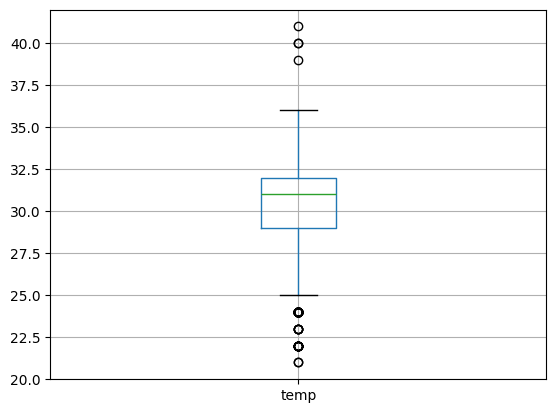

In [8]:
df_in=IOT_temp[IOT_temp["out/in"]=="In"]
df_out=IOT_temp[IOT_temp["out/in"]=="Out"]
df_in.reset_index(drop=True)

df_in.boxplot("temp");

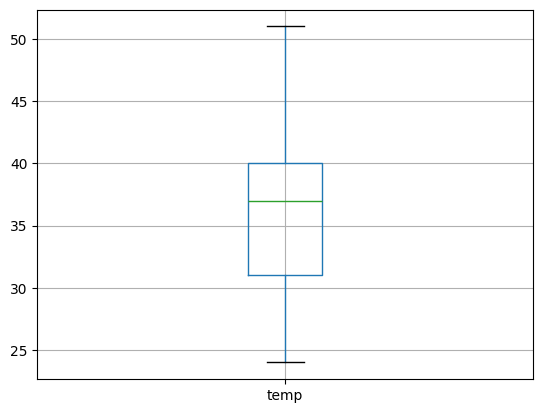

In [9]:
df_out.boxplot("temp");

Temos possíveis outliers para as temperaturas internas e não identificamos possíveis outliers para as temperaturas externas.




### Pergunta 6:
Analisando o histograma e o resultado do teste para a amostra retirada, o que podemos falar sobre a normalidade dos dados?

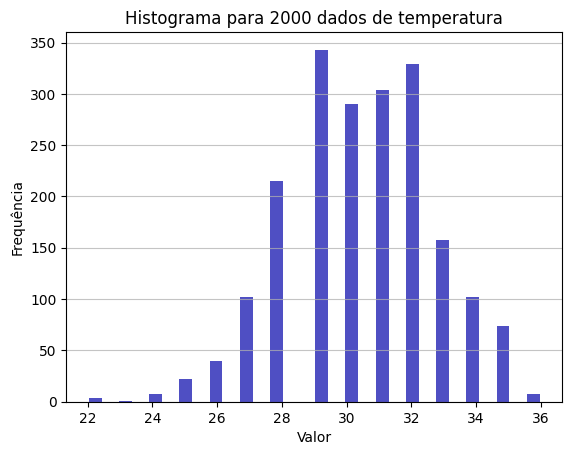

In [10]:
#verificando se os dados internos possuem uma distribuição normal por meio do histograma
## obs.: fornecido pelo enunciado
temperatura=df_in.sample(n=2000,random_state=32)['temp']

n, bins, patches = plt.hist(x=temperatura, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma para 2000 dados de temperatura');

In [11]:
#utilizando o teste de D’Agostino’s Test para verificar a normalidade dos dados de temperatura
from scipy.stats import normaltest                                      #módulo utilizado para a realização do teste de normalidade
f_valor, p_valor = normaltest(temperatura)                              #aplica o teste sobre os dados
print('f-valor=%.3f, p-valor=%.3f' % (f_valor, p_valor))
alpha = 0.05                                                         #nível de significância
if p_valor > alpha:
	print('Não rejeita H0')
else:
	print('Rejeita H0')

f-valor=3.881, p-valor=0.144
Não rejeita H0


Indicam a existência de normalidade para os dados da amostra.



### Pergunta 7:
Após aplicar a transformação df_in['noted_date']= pd.to_datetime(df_in['noted_date'],errors='coerce') para os dados presentes na coluna ‘'noted_date'’, quantos valores nulos passaram a existir nos dados?

In [12]:
df_in['noted_date']= pd.to_datetime(df_in['noted_date'],errors='coerce')
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20345 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          20345 non-null  object        
 1   room_id/id  20345 non-null  object        
 2   noted_date  15329 non-null  datetime64[ns]
 3   temp        20345 non-null  int64         
 4   out/in      20345 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 953.7+ KB


<ipython-input-12-2972dad4fb46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in['noted_date']= pd.to_datetime(df_in['noted_date'],errors='coerce')


In [13]:
df_in['noted_date'].isnull().sum()

np.int64(5016)

### Pergunta 8:
Após aplicar a transformação df_in['noted_date']= pd.to_datetime(df_in['noted_date'],errors='coerce') para os dados presentes na coluna ‘'noted_date'’, quantos tipos de dados passaram a existir?

In [14]:
3

3

### Pergunta 9:
Analisando o boxplot da temp_in e temp_out, o que é possível afirmar?


In [15]:
df_in=df_in.sort_values(by=['noted_date'])
df_in.head()

,id,room_id/id,noted_date,temp,out/in
16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
16186,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In
16176,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In
16174,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In
16167,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In


In [16]:
df_in.reset_index(drop=True)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
1,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In
2,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In
3,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In
4,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In
...,...,...,...,...,...
20340,__export__.temp_log_91076_7fbd08ca,Room Admin,NaT,31,In
20341,__export__.temp_log_147733_62c03f31,Room Admin,NaT,31,In
20342,__export__.temp_log_100386_84093a68,Room Admin,NaT,31,In
20343,__export__.temp_log_123297_4d8e690b,Room Admin,NaT,31,In


In [17]:
df_out['noted_date']= pd.to_datetime(df_out['noted_date'],errors='coerce')
df_out=df_out.sort_values(by=['noted_date'])
df_out.reset_index(drop=True)

<ipython-input-17-31ed61fef10b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['noted_date']= pd.to_datetime(df_out['noted_date'],errors='coerce')


,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out
1,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out
2,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out
3,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out
4,__export__.temp_log_127981_32c85db7,Room Admin,2018-01-11 00:25:00,40,Out
...,...,...,...,...,...
77256,__export__.temp_log_99990_0866b052,Room Admin,NaT,32,Out
77257,__export__.temp_log_106366_5b89332c,Room Admin,NaT,32,Out
77258,__export__.temp_log_128809_5b2685b6,Room Admin,NaT,32,Out
77259,__export__.temp_log_111718_05b8d88d,Room Admin,NaT,32,Out


In [18]:
print("Registros existentes no df_IN: ",df_in.count()[0])
print("Registros existentes no df_OUt: ",df_out.count()[0])

<ipython-input-18-9d1e9e57dbe5>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Registros existentes no df_IN: ",df_in.count()[0])


Registros existentes no df_IN:  20345
Registros existentes no df_OUt:  77261


<ipython-input-18-9d1e9e57dbe5>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Registros existentes no df_OUt: ",df_out.count()[0])


In [19]:
#comparando as duas temperaturas "estatisticamente"
frame = { 'temp_in': df_in.temp, 'temp_out': df_out.temp }
df_in_out=pd.DataFrame(frame)
df_in_out.head()

,temp_in,temp_out
0,29.0,NaN
1,29.0,NaN
2,NaN,41.0
3,NaN,41.0
4,31.0,NaN


In [20]:
#mostrando os dados
df_in_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97606 entries, 0 to 97605
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp_in   20345 non-null  float64
 1   temp_out  77261 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB


In [21]:
#exemplificando o pivot
table = pd.pivot_table(IOT_temp, values='temp', index=['noted_date'], columns= ["out/in"],fill_value=0)
table

out/in,In,Out
noted_date,,
01-11-2018 00:06,32.0,0.0
01-11-2018 00:07,0.0,40.0
01-11-2018 00:09,0.0,39.0
01-11-2018 00:13,0.0,40.0
01-11-2018 00:23,0.0,40.0
...,...,...
31-10-2018 23:52,0.0,40.0
31-10-2018 23:53,0.0,39.0
31-10-2018 23:54,32.0,0.0


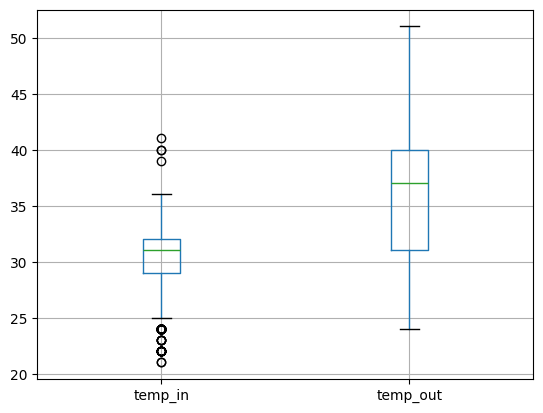

In [22]:
#comparando a igualdade dos valores In e Out
df_in_out.boxplot();

Existe uma maior dispersão nos dados de temperatura externa.

### Pergunta 10:
Após a construção da rede neural recorrente (RNR), utilizando o modelo LSTM e o código presente na célula [34], o que é INCORRETO dizer?

In [23]:
#criando um modelo de previsão de temperatura
df_out_new=IOT_temp[IOT_temp["out/in"]=="Out"]["temp"].values

In [24]:
#normaliza os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
serie_out = scaler.fit_transform(df_out_new.reshape(-1, 1))

In [25]:
serie_out

array([[0.62962963],
       [0.62962963],
       [0.66666667],
       ...,
       [0.2962963 ],
       [0.2962963 ],
       [0.2962963 ]])

In [26]:
#define a quantidade de dados para treinamento e teste
train=serie_out[:int(len(serie_out)*0.7)]      #70% inicial para o treinamento
test=serie_out[int(len(serie_out)*0.7):]       #30% final para o teste

In [27]:
#método para colcoar os dados de entrada em um formato necessário para a previsão
#define o intervalo a ser utilizado para entrada da rede neural recorrente LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [28]:
look_back = 3                                           # quantidade de passos para a autocorrelação
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [29]:
#colocando os dados no formato para entrada na rede LSTM  [amostras, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

In [30]:
#definindo o modelo para a rede neural recorrente LSTM
from tensorflow.keras.models import Sequential              #utilizando o modelo sequencial para a construção da rede
from tensorflow.keras.layers import Dense, Flatten, LSTM    #utilizado para definir as camadas a serem utilizadas


In [31]:
#definindo o modelo
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
#mostra o modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

A rede possui quatro camadas escondidas.

### Pergunta 11:
Analisando o gráfico da função perda, o que é INCORRETO afirmar?


In [33]:
historico=model.fit(trainX, trainY, validation_split=0.2,epochs=10, batch_size=100, verbose=2)

Epoch 1/10
433/433 - 4s - 10ms/step - loss: 0.0426 - val_loss: 0.0221
Epoch 2/10
433/433 - 1s - 2ms/step - loss: 0.0027 - val_loss: 0.0141
Epoch 3/10
433/433 - 1s - 3ms/step - loss: 0.0016 - val_loss: 0.0064
Epoch 4/10
433/433 - 1s - 2ms/step - loss: 7.2449e-04 - val_loss: 0.0023
Epoch 5/10
433/433 - 1s - 3ms/step - loss: 4.5097e-04 - val_loss: 0.0013
Epoch 6/10
433/433 - 1s - 3ms/step - loss: 4.2039e-04 - val_loss: 0.0012
Epoch 7/10
433/433 - 1s - 2ms/step - loss: 4.1912e-04 - val_loss: 0.0012
Epoch 8/10
433/433 - 1s - 2ms/step - loss: 4.1916e-04 - val_loss: 0.0012
Epoch 9/10
433/433 - 1s - 3ms/step - loss: 4.1929e-04 - val_loss: 0.0012
Epoch 10/10
433/433 - 2s - 5ms/step - loss: 4.1960e-04 - val_loss: 0.0012


In [34]:
#mostrando as keys presentes no objeto history do keras
print(historico.history.keys())

dict_keys(['loss', 'val_loss'])


In [ ]:
#plotando os gráficos para a função perda do algoritmo
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Função perda durante o treinamento')
plt.ylabel('Função perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()

É uma evidência clara de Overfitting.

### Pergunta 12:
Analisando o MSE mostrado para o treinamento e teste do algoritmo, o que é INCORRETO afirmar?

In [ ]:
# realizando as previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# colocando os dados em um formato para a previsão "correta"
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
#identificando o "qualidade" do modelo
import math                                       #utilizada para realizar as operações matemáticas
from sklearn.metrics import mean_squared_error    #calcular o erro médio quadrático nas previsões

In [ ]:
# Calculando os erros de previsão
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Pontuação para o treinamento: %.2f MSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Pontuação para o teste: %.2f MSE' % (testScore))

Eles mostram o overfitting do algoritmo.

### Pergunta 13:
Analisando o gráfico comparativo entre os valores reais e previstos, o que é CORRETO afirmar?

In [ ]:
# realizando o shift dos valores para construir o plot dos valores
trainPredictPlot = np.empty_like(serie_out)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# realizando um shift dos dados de previsão para o treinamento
testPredictPlot = np.empty_like(serie_out)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(serie_out)-1, :] = testPredict

In [ ]:
# realizando o plot dos dados para treinamento e teste
plt.figure(figsize=(10,10))  #define o tamanho da figura
plt.plot(scaler.inverse_transform(serie_out))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Real","Previsao Treinamento","Previsão Teste"])
plt.show()

Boa parte das previsões/testes apresentam valores superiores ao real.

### Pergunta 14:
Qual dos algoritmos abaixo NÃO representa uma boa indicação para resolver o problema de previsão supervisionada de temperatura?

Autoencoders.

### Pergunta 15:
Assinale a alternativa que contém uma afirmativa INCORRETA sobre a rede neural utilizada para solução do problema presente neste trabalho prático.

Para essa rede, é possível realizar a sintonia dos parâmetros a fim de melhorar o desempenho do algoritmo.